In [3]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
     | 149.0MB 1.2MB/s
     |████████████████████████████████| 6.5MB 3.9MB/s 
     |████████████████████████████████| 225kB 49.1MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759561 sha256=5a0444acee9b460382a3ffd3e5617fdd7a2e2bca1b8bb93f3124dc1f8b0bc0b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-eb7r94re/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl 

In [4]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 4.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702409 sha256=56dbd08c6b412eba88721776bd1c61c52dd90685e7295a6c639b76cfbf197526
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.1
    Uninstalling pyproj-3.0.1:
      Successfully uninstalled pyproj-3.0.1


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from mpl_toolkits.basemap import Basemap
import geopy
from geopy.geocoders import Nominatim

In [6]:
df1 = pd.read_csv('Skyteam_Exchange.csv')
df2 = pd.read_csv('PointzAggregator-AirlinesData.csv', index_col=0)
df3 = pd.read_csv('FrequentFlyerForum-Profiles.csv')
geolocator = Nominatim(user_agent="airlines")

In [ ]:
df1.head()

,CLASS,FARE,DATA,FLIGHT,FROM,STATUS,TO,PROGRAMM,NUMBER
0,Y,YRSTFN,2017-01-01,AF1145,SVO,LANDED,CDG,FB,520518073
1,Y,YGRPZR,2017-01-01,AF1844,SVO,LANDED,CDG,FB,18427809
2,Y,YRSTJQ,2017-01-01,AF4855,SVO,LANDED,CDG,KE,993927664
3,Y,YGRPAT,2017-01-01,AF4901,SVO,LANDED,CDG,SU,789402704
4,Y,YFLXKO,2017-01-01,AZ545,SVO,LANDED,FCO,KE,352734424


In [ ]:
df2.head()

,@type,Code,Date,Departure,Arrival,Fare,@uid,firstname,lastname,cards.@type,cards.card.bonusprogramm,cards.card.activities.@type,programm,number
0,Flight,KE827,2017-08-06,rea,SZX,YGRPZT,613142142,IAROMIR,ZVEREV,Airlines,Flying Blue,Airlines,FB,171388778
1,Flight,MU9706,2017-10-26,PEK,BSD,YSTNYV,613142142,IAROMIR,ZVEREV,Airlines,Flying Blue,Airlines,FB,171388778
2,Flight,DL5058,2017-09-11,CHA,ATL,YRSTKY,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759
3,Flight,KE1,2017-04-01,rea,HNL,PRSTRU,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759
4,Flight,DL837,2017-09-13,ATL,HNL,YGRPNG,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759


In [ ]:
df3.head()

,Date,Codeshare,Flight,Arrival.City,Arrival.Airport,Arrival.Country,Departure.City,Departure.Airport,Departure.Country,Sex,NickName,Real Name.Last Name,Real Name.First Name,Passports,Status,programm,Number
0,2017-03-04,False,DL3377,Pittsburgh PA,PIT,United States of,Boston MA,BOS,United States of,Male,FrequentFlyer0,NaN,NaN,NaN,Basic,KE,889215424.0
1,2017-03-04,False,DL3377,Pittsburgh PA,PIT,United States of,Boston MA,BOS,United States of,Male,FrequentFlyer0,NaN,NaN,NaN,Elite+,DT,484697244.0
2,2017-07-21,False,DL3630,Detroit MI,DTW,United States of,Green Bay WI,GRB,United States of,Male,FrequentFlyer0,NaN,NaN,NaN,Basic,KE,889215424.0
3,2017-07-21,False,DL3630,Detroit MI,DTW,United States of,Green Bay WI,GRB,United States of,Male,FrequentFlyer0,NaN,NaN,NaN,Elite+,DT,484697244.0
4,2017-03-22,False,DL5361,New York NY,LGA,United States of,Pittsburgh PA,PIT,United States of,Male,FrequentFlyer0,NaN,NaN,NaN,Basic,KE,889215424.0


In [ ]:
df2.Code.describe()

count     436090
unique     23849
top       SU4606
freq         984
Name: Code, dtype: object

In [ ]:
df1.shape

(1682517, 9)

In [ ]:
df2.shape

(436090, 14)

In [ ]:
df2[df2['@uid'] == 103197717]

,@type,Code,Date,Departure,Arrival,Fare,@uid,firstname,lastname,cards.@type,cards.card.bonusprogramm,cards.card.activities.@type,programm,number
2,Flight,DL5058,2017-09-11,CHA,ATL,YRSTKY,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759
3,Flight,KE1,2017-04-01,rea,HNL,PRSTRU,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759
4,Flight,DL837,2017-09-13,ATL,HNL,YGRPNG,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759
5,Flight,SU1523,2017-02-12,NUX,SVO,YFLXPS,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE,696768759


In [7]:
# количество уникальных номеров карт лояльности
uniq_count = df2.groupby(['programm', 'number'], as_index=False).agg({'@uid' : lambda x: len(np.unique(x))})

In [8]:
# карты лояльности, которыми владеют несколько человек
sus_num = uniq_count[uniq_count['@uid'] > 1]['number'].values

In [9]:
sus_num

array([139888197])

In [10]:
# имена этих личностей
suspects = pd.DataFrame()
for number in sus_num:
    sus = df2[df2['number'] == number][['firstname', 'lastname', 'number']].drop_duplicates()
    suspects = suspects.append(sus, ignore_index = 1)

In [ ]:
suspects

,firstname,lastname,number
0,ROMAN,MASLENNIKOV,139888197
1,OLESYA,GOLOVINA,139888197


In [ ]:
df2[df2['number'] == 139888197]

,@type,Code,Date,Departure,Arrival,Fare,@uid,firstname,lastname,cards.@type,cards.card.bonusprogramm,cards.card.activities.@type,programm,number
130045,Flight,MU5529,2017-08-17,SHA,DQA,ARSTVF,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130046,Flight,MU5529,2017-08-27,DQA,SHA,JFLXII,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130047,Flight,CZ6483,2017-11-27,SHE,HGH,YFLXPT,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130048,Flight,MU218,2017-04-06,rea,YNZ,YGRPQY,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130049,Flight,CZ6402,2017-11-21,CTU,SHE,YSTNNB,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130050,Flight,MU8332,2017-02-22,PEK,rea,AFLXNE,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130051,Flight,MU9549,2017-11-19,SHA,CTU,YRSTLE,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
130052,Flight,MU5242,2017-12-16,HGH,TYN,YSTNJP,146589094,ROMAN,MASLENNIKOV,Airlines,Flying Blue,Airlines,FB,139888197
312850,Flight,ME2231,2017-07-29,BEY,FCO,YFLXGN,866799462,OLESYA,GOLOVINA,Airlines,Flying Blue,Airlines,FB,139888197
312851,Flight,SU1120,2017-01-18,SVO,AER,YFLXHU,866799462,OLESYA,GOLOVINA,Airlines,Flying Blue,Airlines,FB,139888197


In [ ]:
df3[df3['Number'] == 139888197]

,Date,Codeshare,Flight,Arrival.City,Arrival.Airport,Arrival.Country,Departure.City,Departure.Airport,Departure.Country,Sex,NickName,Real Name.Last Name,Real Name.First Name,Passports,Status,programm,Number
575832,2017-01-01,False,SU1457,Moscow,SVO,Russian Federation,Kemerovo,KEJ,Russian Federation,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575835,2017-08-17,False,MU5529,Daqing,DQA,China,Shanghai,SHA,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575838,2017-08-27,False,MU5529,Shanghai,SHA,China,Daqing,DQA,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575841,2017-01-17,False,SU512,Tehran,IKA,Iran,Moscow,SVO,Russian Federation,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575844,2017-09-24,False,CZ3541,Kunming,KMG,China,Wuhan,WUH,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575847,2017-11-27,False,CZ6483,Hangzhou,HGH,China,Shenyang,SHE,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575850,2017-04-06,False,MU218,Yancheng,YNZ,China,Seoul,rea,Ko,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575853,2017-06-14,False,MU6555,Tongxiang,TVX,China,Shanghai,SHA,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575856,2017-08-29,False,MU2510,Wuhan,WUH,China,Shanghai,SHA,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0
575859,2017-11-21,False,CZ6402,Shenyang,SHE,China,Chengdu,CTU,China,NaN,FrequentFlyer29897,NaN,NaN,NaN,Elite,FB,139888197.0


In [11]:
# группировка uid по номеру карты лояльности
uniq = df2.groupby(['programm', 'number'], as_index=False).agg({'@uid' : lambda x: np.unique(x)[0]})

In [12]:
for number in sus_num:
    idx = uniq[uniq['number'] == number].index
    uniq.drop(idx, inplace=True)

In [13]:
# добавление uid к датасету df1
df1_with_uid = df1.join(uniq.set_index(['programm', 'number']), on=['PROGRAMM', 'NUMBER']).dropna()

In [ ]:
df3.shape

(1931942, 17)

In [ ]:
users = df3.NickName.unique()

In [ ]:
uniq_count2 = df3.groupby(['programm', 'Number'], as_index=False).agg({'NickName' : lambda x: len(np.unique(x))})

In [ ]:
len(df3['Departure.City'].unique())

1093

In [ ]:
uniq_count2[uniq_count2['NickName'] > 1]

,programm,Number,NickName
25263,FB,139888197.0,2


In [ ]:
# выделение разрывающихся маршрутов и инициализация графов этих перелетов
graphs = []
for user in users:
    sorted_flights = df3[df3['NickName'] == user].sort_values(by=['Date'])
    flightsOf = sorted_flights[['Date', 'Flight', 'Departure.City', 'Arrival.City', 'NickName']].drop_duplicates()
    current = None
    for i, j in zip(flightsOf['Departure.City'].values, flightsOf['Arrival.City'].values):
        if current is None:
            current = j
        elif current != i:
            edges = flightsOf[['Departure.City', 'Arrival.City']]
            G = nx.from_pandas_edgelist(edges, source='Departure.City', target='Arrival.City', edge_attr=True, create_using=nx.DiGraph)
            graphs.append(G)
            #nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), node_color="#f0f0f0", node_size=3000, width=10)
            break
        current = j
    print("user {} is checked".format(user))

user 438181628.0 is checked
user 326758367.0 is checked
user 882817776.0 is checked
user 491286390.0 is checked
user 749111794.0 is checked
user 188346508.0 is checked


In [ ]:
len(graphs)

0

In [ ]:
len(users)

66592

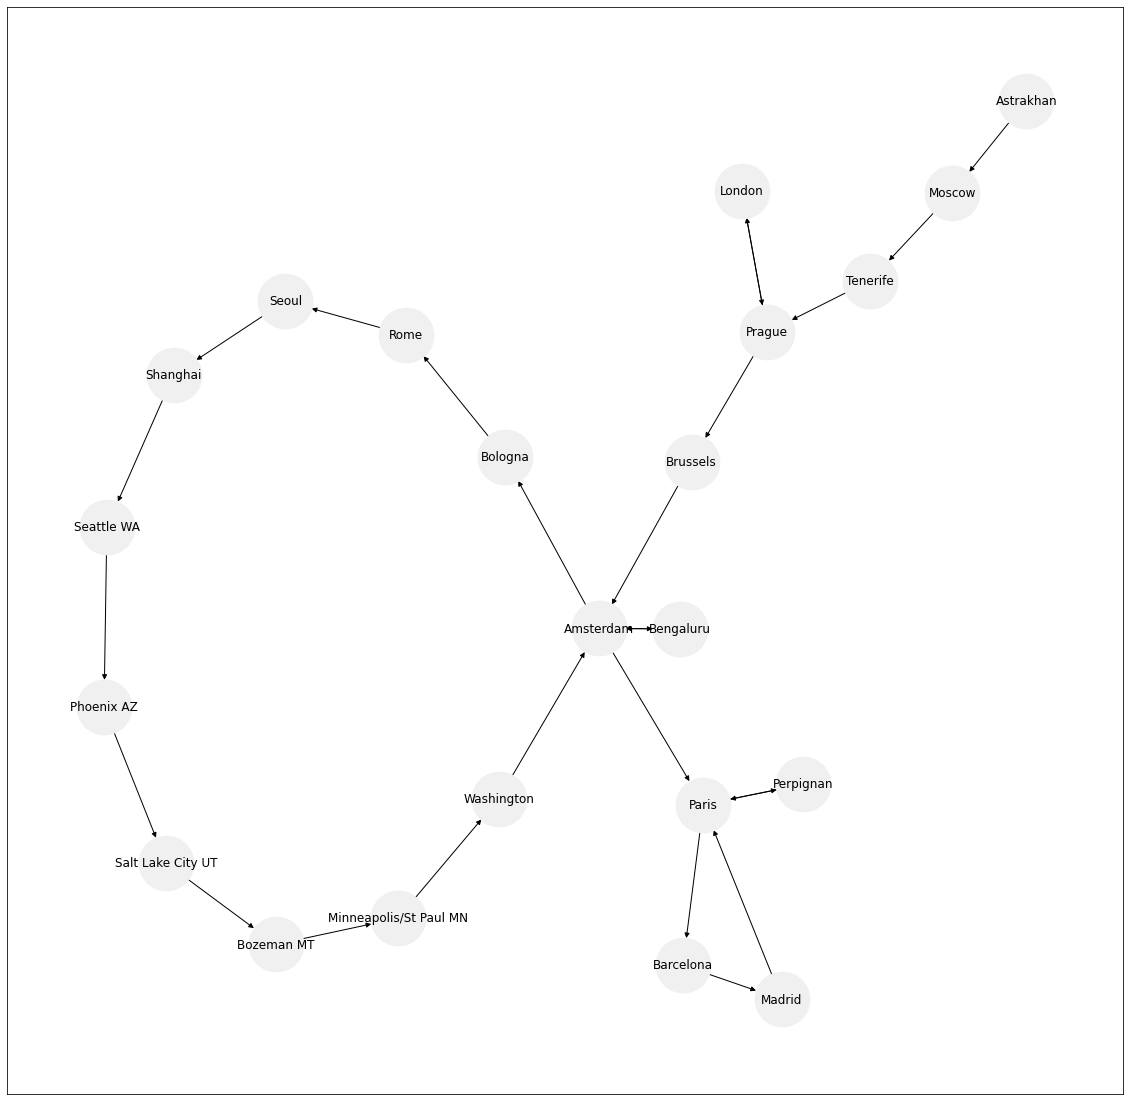

In [ ]:
# пример графа перелетов
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), node_color="#f0f0f0", node_size=3000, linewidth=10)

In [14]:
# выделение уникальных пользователей
users = df1_with_uid['@uid'].unique()

In [15]:
# слияние df1 с uid и df3 для того, чтобы получить названия городов прилета и отлета
joined = df1_with_uid.join(df3[['Date', 'Flight', 'Departure.City', 'Arrival.City', 'Number']]
                  .set_index(['Date', 'Flight', 'Number']), on=['DATA', 'FLIGHT', 'NUMBER'])

In [16]:
nonNA = joined.dropna()

In [45]:
# поиск разраывающихся маршрутов в вышеназванном датасете и инициализация графов
graphs = {}
labels = {}
for user in users:
  sorted_flights = nonNA[nonNA['@uid'] == user].sort_values(by=['DATA'])
  flightsOf = sorted_flights[['DATA', 'FLIGHT', 'Departure.City', 'Arrival.City', 'NUMBER']].drop_duplicates()
  current = None
  isBadFlight = False
  label = {}
  k = 1
  for i, j in zip(flightsOf['Departure.City'].values, flightsOf['Arrival.City'].values):
    if current is None:
      current = j
    elif current != i:
      isBadFlight = True
    current = j
    label[(i, j)] = k
    k += 1

  if isBadFlight:
    edges = flightsOf[['Departure.City', 'Arrival.City']]
    G = nx.from_pandas_edgelist(edges, source='Departure.City', target='Arrival.City', create_using=nx.DiGraph)
    graphs[user] = G
    labels[user] = label

  print("num {} is checked".format(user))

Выходные данные были обрезаны до нескольких последних строк (5000).
num 530415838.0 is checked
num 187687372.0 is checked
num 952096255.0 is checked
num 226793437.0 is checked
num 700957768.0 is checked
num 411019259.0 is checked
num 400129133.0 is checked
num 506210066.0 is checked
num 449620988.0 is checked
num 796055520.0 is checked
num 522811685.0 is checked
num 375356210.0 is checked
num 457591284.0 is checked
num 623060097.0 is checked
num 471037284.0 is checked
num 494217716.0 is checked
num 374137340.0 is checked
num 303219414.0 is checked
num 898132813.0 is checked
num 592202675.0 is checked
num 920182379.0 is checked
num 750032771.0 is checked
num 871295323.0 is checked
num 778875944.0 is checked
num 452017185.0 is checked
num 370751683.0 is checked
num 577794956.0 is checked
num 656140998.0 is checked
num 763041743.0 is checked
num 531450319.0 is checked
num 801805117.0 is checked
num 312325728.0 is checked
num 234220056.0 is checked
num 817447073.0 is checked
num 725427765.

In [21]:
len(graphs)

154

In [22]:
graph_158 = graphs

In [23]:
graph_158.keys()

dict_keys([216617553.0, 136463763.0, 869883854.0, 349684780.0, 338260911.0, 284498996.0, 622959739.0, 941109251.0, 427701156.0, 801858682.0, 626644911.0, 259404554.0, 238339502.0, 866799462.0, 521173021.0, 617987514.0, 765883341.0, 233258388.0, 190504554.0, 580504863.0, 245846186.0, 187145957.0, 344356767.0, 169740058.0, 514502570.0, 286391704.0, 562414614.0, 523235126.0, 232322092.0, 179066184.0, 237442550.0, 145929788.0, 812495560.0, 117176623.0, 503731662.0, 256000854.0, 167665523.0, 818734294.0, 675928744.0, 325692261.0, 762351870.0, 245254952.0, 778494082.0, 291661805.0, 475164086.0, 489810725.0, 934424884.0, 978046880.0, 994081807.0, 114398007.0, 663637147.0, 798247651.0, 250841701.0, 747354872.0, 399859150.0, 475129406.0, 313513185.0, 968269718.0, 500912117.0, 111268646.0, 833511495.0, 291743839.0, 177117250.0, 325517736.0, 500519544.0, 163555254.0, 202714180.0, 835355365.0, 588338063.0, 355630428.0, 402322247.0, 437124733.0, 122970105.0, 632249389.0, 833657024.0, 599836719.0, 1

In [74]:
# отрисовка графа
# places - словарь с широтой и долготой городов
# network - список ребер графа
# boundary - кортеж из 4х эдементов для обрезания карты мира
#            широта и долгота левого нижнего и правого верхнего углов
# uid - уникальное id по которому находятся имена и фамилии пассажиров (работает только с df2)
def drawmap(places, network, boundary, edge_labels, uid):
  plt.figure(dpi=200, figsize=(15, 15))
  m = Basemap(projection='cyl',
              llcrnrlon  =   boundary[1]-10, # Longitude lower right corner
              llcrnrlat  =   boundary[0]-10, # Latitude lower right corner
              urcrnrlon  =   boundary[3]+10, # Longitude upper right corner
              urcrnrlat  =   boundary[2]+10, # Latitude upper right corner
              lon_0=0,
              resolution='l')
  m.drawcoastlines(linewidth=0.25)
  m.drawcountries(linewidth=0.25)
  m.fillcontinents(color='grey',lake_color='white')
  m.drawmapboundary(fill_color='white')

  # вычисление локальных координат
  poses = {}
  for city in network.nodes:
    lat, lon = places[city]
    poses[city] = m(lon, lat)

  nx.draw_networkx(network, pos = poses, with_labels=False, node_size=30, node_color='#ff0000')
  nx.draw_networkx_edge_labels(G, poses, edge_labels=edge_labels, label_pos=0.35, font_color='#880000')

  plt.title("flights of {}".format(uid))

  #plt.savefig("/content/drive/MyDrive/map2/{}.png".format(int(uid)), dpi=200)
  plt.show()

In [41]:
# составление словаря с локацией городов
places = {}
for city in G.nodes:
  location = geolocator.geocode(city)
  lat, lon = location.latitude, location.longitude
  places[city] = (lat, lon)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
graph_158.keys()

dict_keys([216617553.0, 136463763.0, 869883854.0, 349684780.0, 338260911.0, 284498996.0, 622959739.0, 941109251.0, 427701156.0, 801858682.0, 626644911.0, 259404554.0, 238339502.0, 866799462.0, 521173021.0, 617987514.0, 765883341.0, 233258388.0, 190504554.0, 580504863.0, 245846186.0, 187145957.0, 344356767.0, 169740058.0, 514502570.0, 286391704.0, 562414614.0, 523235126.0, 232322092.0, 179066184.0, 237442550.0, 145929788.0, 812495560.0, 117176623.0, 503731662.0, 256000854.0, 167665523.0, 818734294.0, 675928744.0, 325692261.0, 762351870.0, 245254952.0, 778494082.0, 291661805.0, 475164086.0, 489810725.0, 934424884.0, 978046880.0, 994081807.0, 114398007.0, 663637147.0, 798247651.0, 250841701.0, 747354872.0, 399859150.0, 475129406.0, 313513185.0, 968269718.0, 500912117.0, 111268646.0, 833511495.0, 291743839.0, 177117250.0, 325517736.0, 500519544.0, 163555254.0, 202714180.0, 835355365.0, 588338063.0, 355630428.0, 402322247.0, 437124733.0, 122970105.0, 632249389.0, 833657024.0, 599836719.0, 1

In [49]:
G = graph_158[136463763.0]

In [50]:
EL = labels[136463763.0]

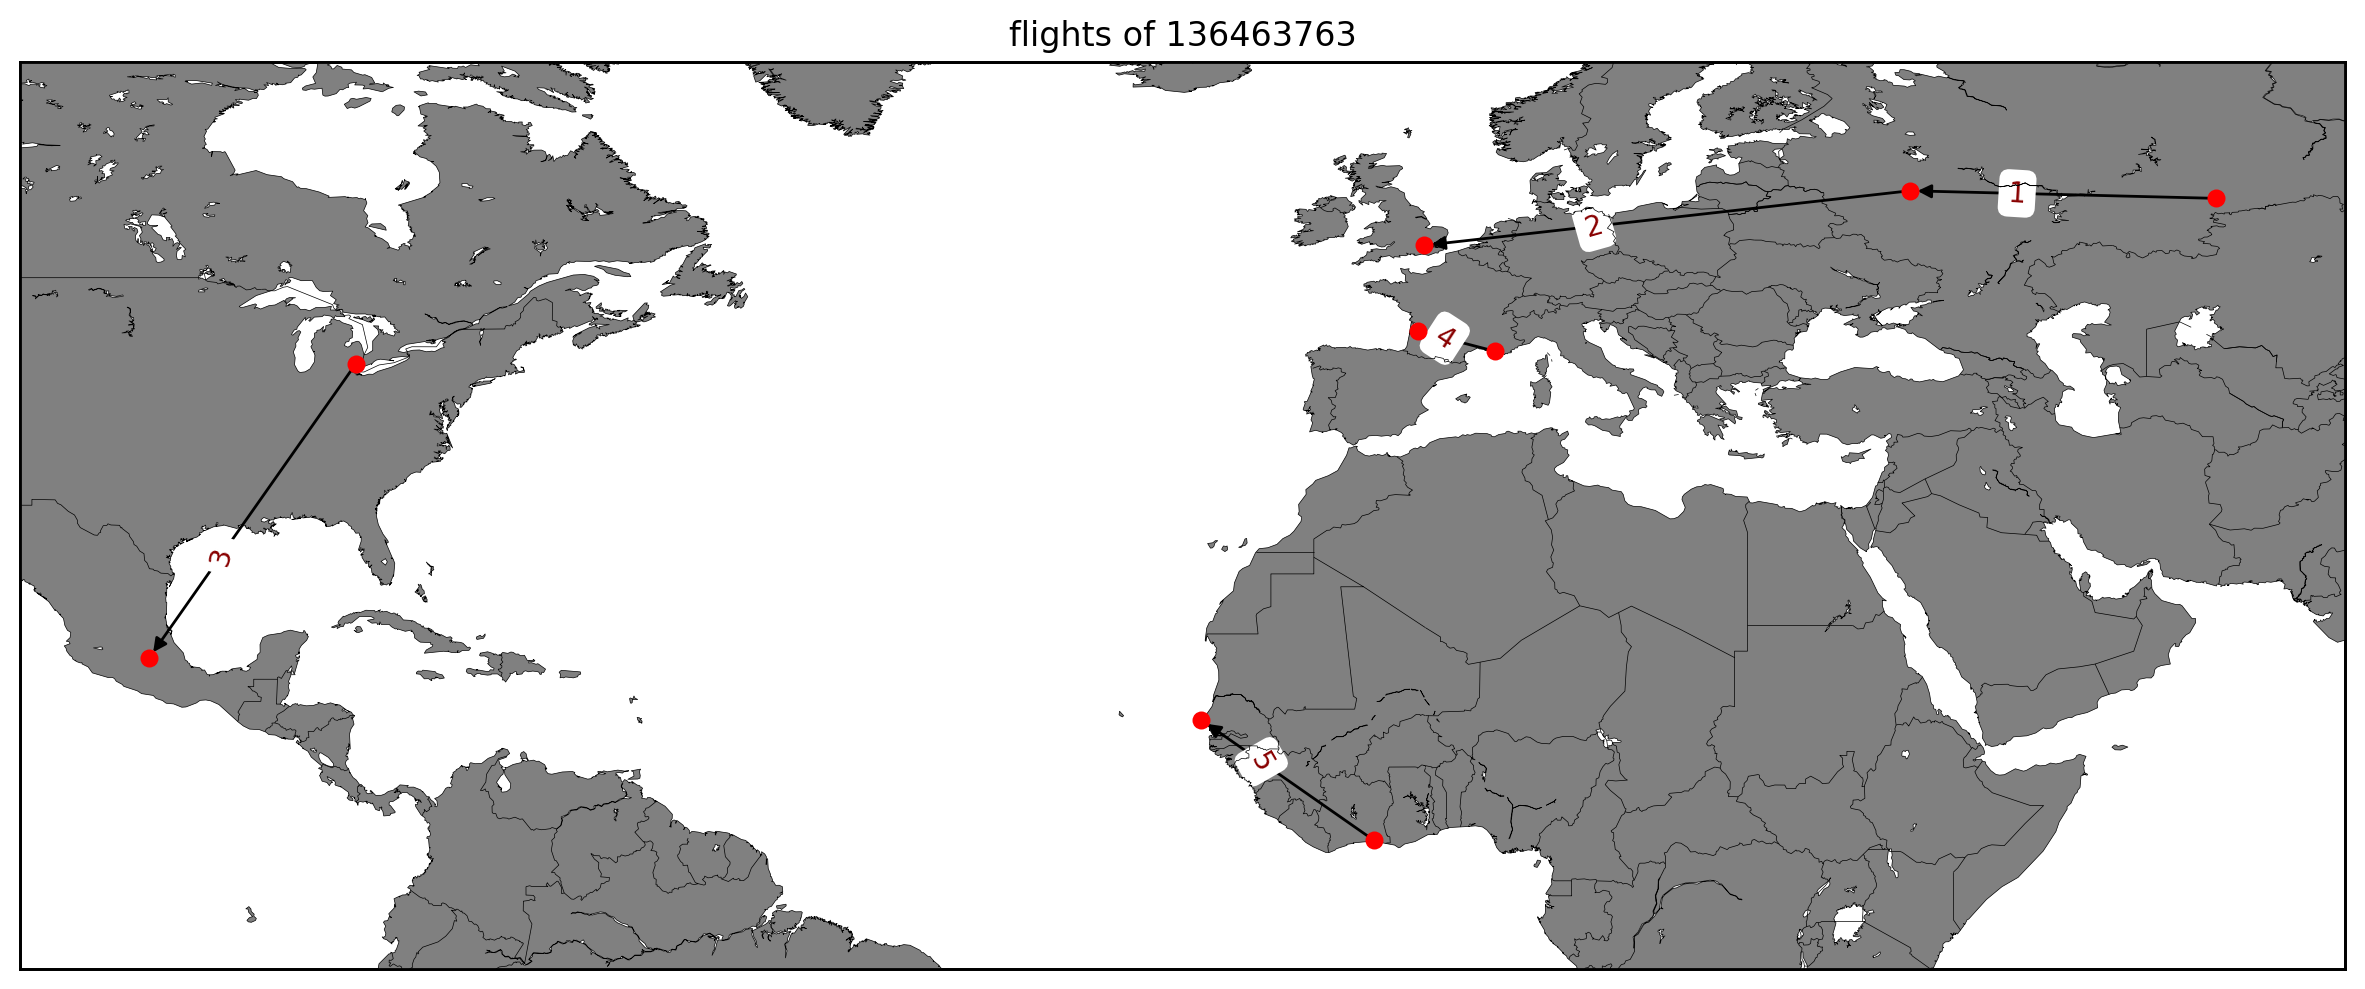

In [75]:
# нахождение границ и вывод картинки
boundary = [1000, 1000, -1000, -1000]
for city in G.nodes:
  location = geolocator.geocode(city)
  lat, lon = location.latitude, location.longitude
  if lat < boundary[0]:
    boundary[0] = lat
  if lon < boundary[1]:
    boundary[1] = lon
  if lat > boundary[2]:
    boundary[2] = lat
  if lon > boundary[3]:
    boundary[3] = lon
  places[city] = (lat, lon)
drawmap(places, G, boundary, EL, 136463763)

AttributeError: ignored

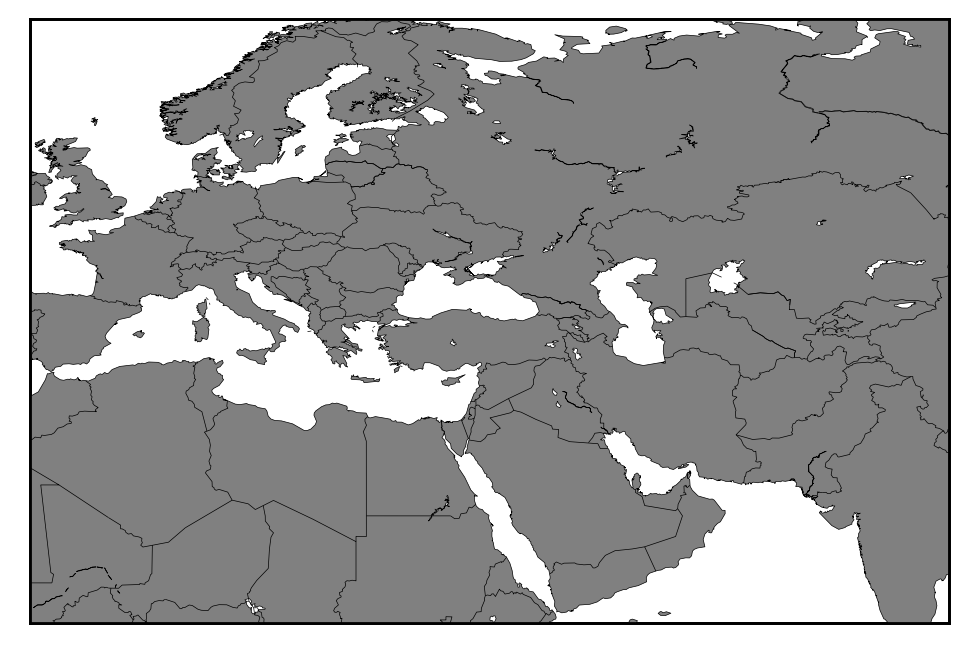

In [48]:
# places = {}
# for uid, G in graph_158.items():
#   boundary = [1000, 1000, -1000, -1000]
#   for city in G.nodes:
#     location = geolocator.geocode(city)
#     lat, lon = location.latitude, location.longitude
#     if lat < boundary[0]:
#       boundary[0] = lat
#     if lon < boundary[1]:
#       boundary[1] = lon
#     if lat > boundary[2]:
#       boundary[2] = lat
#     if lon > boundary[3]:
#       boundary[3] = lon
#     places[city] = (lat, lon)
#   drawmap(places, G.edges, boundary, labels[uid], uid)